In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/face-mask-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [5]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_3457.jpg', 'with_mask_1870.jpg', 'with_mask_287.jpg', 'with_mask_1206.jpg', 'with_mask_2766.jpg']


In [6]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_612.jpg', 'without_mask_114.jpg', 'without_mask_2585.jpg', 'without_mask_625.jpg', 'without_mask_1718.jpg']


In [7]:
len(with_mask_files)

3725

In [8]:
len(without_mask_files)

3828

In [9]:
# creating labels
# with mask----> 1
# without mask---> 0
with_mask_labels=[1]*len(with_mask_files)
without_mask_labels=[0]*len(without_mask_files)

In [10]:
labels=with_mask_labels+without_mask_labels

In [11]:
print(len(labels))

7553


In [12]:
# displaying the images


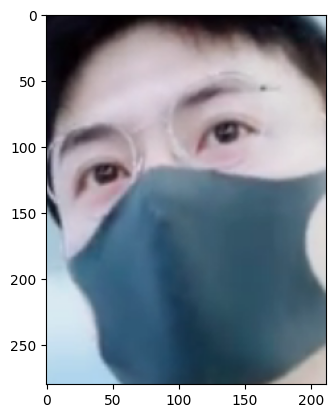

In [13]:
# displaying with mask images
img_mask=mpimg.imread('/content/data/with_mask/with_mask_1212.jpg')
plt.imshow(img_mask)
plt.show()

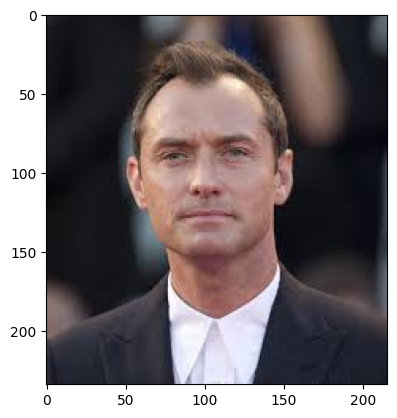

In [14]:
# displaying without mask images
img_nomask=mpimg.imread('/content/data/without_mask/without_mask_2869.jpg')
plt.imshow(img_nomask)
plt.show()

In [15]:
# Image processing


In [16]:
# 1. Resize the image
# 2. Convert the image to numpy arrays

In [17]:
# convert the images to numpy arrays
with_mask_path='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)




  without_mask_path='/content/data/without_mask/'



for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
len(data)

7553

In [19]:
type(data)

list

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# converting image list to numpy arrays
X=np.array(data)
y=np.array(labels)

In [22]:
X.shape

(7553, 128, 128, 3)

In [23]:
y.shape

(7553,)

In [24]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train.shape

(5060, 128, 128, 3)

In [26]:
print(X_train.shape,X_test.shape)

(5060, 128, 128, 3) (2493, 128, 128, 3)


In [27]:
# scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [28]:
# Building a CNN

In [29]:
import tensorflow as tf
from tensorflow import keras


In [30]:
from keras import activations
num_of_classes=2
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# compile the model
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [37]:
# training the NN
history=model.fit(X_train_scaled,y_train,validation_split=0.1,epochs=20)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9711 - loss: 0.0834 - val_accuracy: 0.9348 - val_loss: 0.2498
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9773 - loss: 0.0663 - val_accuracy: 0.9269 - val_loss: 0.2512
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9633 - loss: 0.0967 - val_accuracy: 0.9486 - val_loss: 0.2472
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9666 - loss: 0.0847 - val_accuracy: 0.9289 - val_loss: 0.2681
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9783 - loss: 0.0754 - val_accuracy: 0.9249 - val_loss: 0.3437
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9791 - loss: 0.0559 - val_accuracy: 0.9249 - val_loss: 0.3727
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9819 - loss: 0.0531 - val_accuracy: 0.9032 - val_loss: 0.3426
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9781 - loss: 0.0626 - val_accu

In [38]:
# Model Evaluation
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print('Test accuraacy=',accuracy)


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9256 - loss: 0.3958
Test accuraacy= 0.9257922172546387


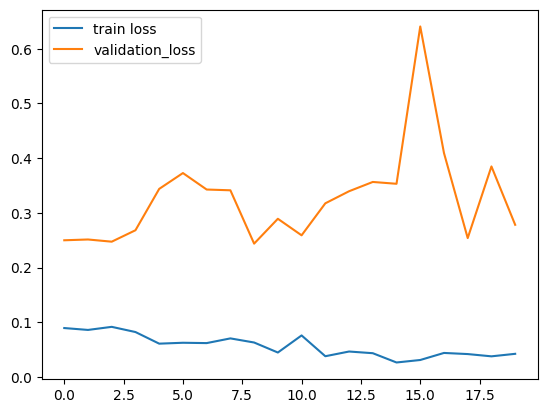

In [39]:


# plot the loss value
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

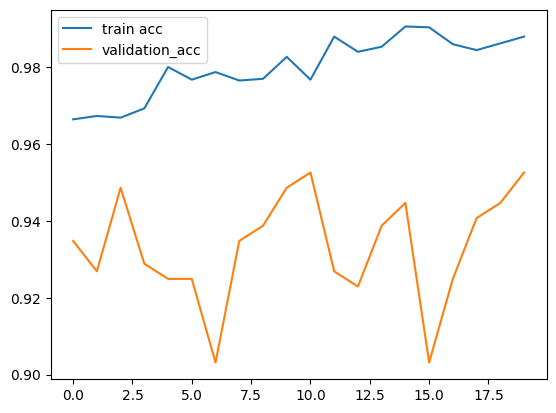

In [40]:
# plot the accuracy value
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='validation_acc')
plt.legend()
plt.show()

Enter the path of the image to be predicted:/content/gettyimages-1272714246-612x612.jpg


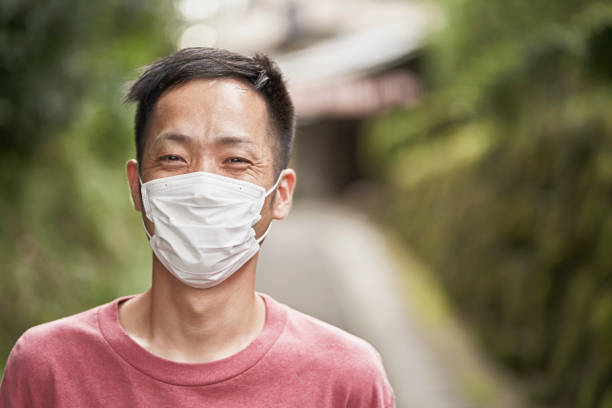

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.6450573  0.39360878]]
0
The person in the image is wearing a mask


In [46]:
# Making  a predictive system
input_image_path=input('Enter the path of the image to be predicted:')

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resize/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label==1:
  print("The person in the image is not wearing a mask")
else:
  print('The person in the image is wearing a mask')